In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install keras 

In [ ]:
pip install tensorflow

In [2]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


Using TensorFlow backend.


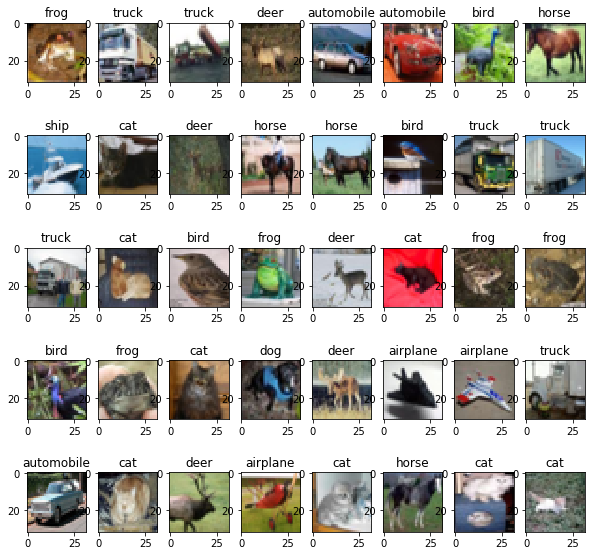

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

plt.figure(figsize=(10, 10))

labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
for i in range(0, 40):
    im = Image.fromarray(X_train[i])
    plt.subplot(5, 8, i + 1)
    plt.title(labels[Y_train[i][0]])
    plt.tick_params(labelbottom="off", bottom="off")
    plt.tick_params(labelleft="off", left="off")
    plt.imshow(im)

plt.show()


In [4]:
#X_train
X_train.shape

(50000, 32, 32, 3)

In [5]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout

num_classes = 10
im_rows = 32
im_cols = 32
im_size = im_rows * im_cols * 3

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(-1, im_size).astype('float32') / 255
X_test = X_test.reshape(-1, im_size).astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(im_size,)))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
model.compile(
    loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']
)

hist = model.fit(X_train, y_train, 
    batch_size=32, epochs=50,
    verbose=1,
    validation_data=(X_test, y_test)
)

score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

# plt.plot(hist.history['acc'])
# plt.plot(hist.history['val_acc'])
# plt.title('Accuracy')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
# plt.title('Loss')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 376us/step - loss: 1.8826 - accuracy: 0.3289 - val_loss: 1.7481 - val_accuracy: 0.3755
Epoch 2/50
50000/50000 [==============================] - 18s 350us/step - loss: 1.7069 - accuracy: 0.3853 - val_loss: 1.6775 - val_accuracy: 0.4050
Epoch 3/50
50000/50000 [==============================] - 18s 365us/step - loss: 1.6385 - accuracy: 0.4163 - val_loss: 1.6396 - val_accuracy: 0.4242
Epoch 4/50
50000/50000 [==============================] - 19s 373us/step - loss: 1.5939 - accuracy: 0.4321 - val_loss: 1.5736 - val_accuracy: 0.4458
Epoch 5/50
50000/50000 [==============================] - 19s 387us/step - loss: 1.5621 - accuracy: 0.4457 - val_loss: 1.6205 - val_accuracy: 0.4127
Epoch 6/50
50000/50000 [==============================] - 20s 402us/step - loss: 1.5415 - accuracy: 0.4526 - val_loss: 1.5502 - val_accuracy: 0.4443
Epoch 7/50
50000/50000 [==============================]

In [ ]:
model.save_weights('cifar10-mlp-weight.h5')

In [ ]:
import cv2
import numpy as np

num_classes = 10
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
im_size = 32 * 32 * 3

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(im_size,)))
model.add(Dense(num_classes, activation='softmax'))

model.load_weights('cifar10-mlp-weight.h5')
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
im = cv2.imread('test-car.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 이미지 출력하기
plt.show()

# MLP로 학습한 이미지 데이터에 형태 맞추기
im = im.reshape(im_size).astype('float32') / 255
# 예측하기
r = model.predict(np.array([im]), batch_size=32,verbose=1)
res = r[0]
# 결과 출력하기
for i, acc in enumerate(res):
    print(labels[i], "=", int(acc * 100))
print("---")
print("예측한 결과=", labels[res.argmax()])